Este é o código em iPython notebook (feito no colab), desenvolvido por Jorge Luiz Medeiros Pires (RA: 790942). Realizado para a Tarefa 1 de Cálculo númerico.

Nele é feita a comparação entre a função

\begin{align}
  f(x) = {x^2}{\cos{(x-1)}}
\end{align}

e o polinômio de Taylor de ordem 3 expandido ao redor de $x_0=1$. O objetivo é observar como o erro decai a media que 
$x \rightarrow x_0$.

Importando as bibliotecas que serão utilizadas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Definindo a função, as derivadas, x0 = 1 e o Polinomio de Taylor Grau 3

In [2]:
def f(x): #a função
  y = x**2*(np.cos(x-1))
  return y

def df(x): #primeira derivada
  y = 2*x*np.cos(x-1)-x**2*np.sin(x-1)
  return y

def d2f(x): #segunda derivada
  y = 2*np.cos(x-1)-4*x*np.sin(x-1)-x**2*np.cos(x-1)
  return y

def d3f(x): #terceira derivada
  y = -6*np.sin(x-1)-6*x*np.cos(x-1)+x**2*np.sin(x-1)
  return y

x0=1 # definindo x0 como 1

def P3(x): #Polinomio de Taylor grau 3
  y = f(x0)+ df(x0)*(x-x0)+(d2f(x0)/2)*(x-x0)**2+(d3f(x0)/6)*(x-x0)**3
  return y

Definido a função, as derivadas e o Polinomio de Taylor foi hora de plotar o primeiro gráfico. Nele é possível visualizar a f(x) em comparação com o Polinomio de Taylor.

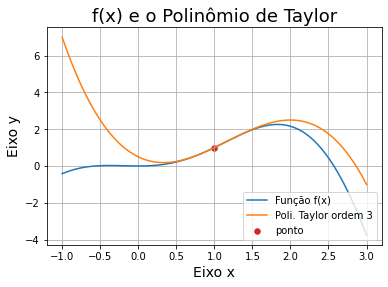

In [3]:
x = np.linspace(-1,3,200)
fig, ax = plt.subplots()
ax.plot(x, f(x), label = "Função f(x)")
ax.plot(x, P3(x), label = "Poli. Taylor ordem 3")
ax.scatter(x0, f(x0), c='tab:red' , s=30, label='ponto', marker = 'o')
ax.set_xlabel("Eixo x",fontsize=14)
ax.set_ylabel("Eixo y",fontsize=14)
ax.set_title("f(x) e o Polinômio de Taylor",fontsize=18)
ax.legend(loc="lower right")
ax.grid(True)
plt.show()

Aqui foi dado um zoom nesse mesmo gráfico. Onde é mostrado o momento que a função e o Polinomio de Taylor começam a se separar.

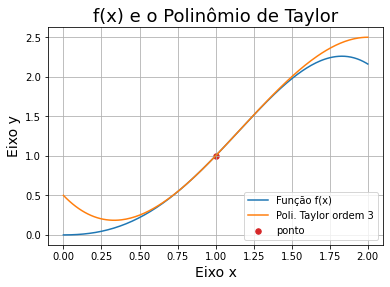

In [4]:
x = np.linspace(0,2,200)
fig, ax = plt.subplots()
ax.plot(x, f(x), label = "Função f(x)")
ax.plot(x, P3(x), label = "Poli. Taylor ordem 3")
ax.scatter(x0, f(x0), c='tab:red' , s=30, label='ponto', marker = 'o')
ax.set_xlabel("Eixo x",fontsize=14)
ax.set_ylabel("Eixo y",fontsize=14)
ax.set_title("f(x) e o Polinômio de Taylor",fontsize=18)
ax.legend(loc="lower right")
ax.grid(True)
plt.show()

Como no exemplo da aula, foi plotado o gráfico do erro definido por: 

$\displaystyle erro(x) = f(x) - P_3(x)$. 


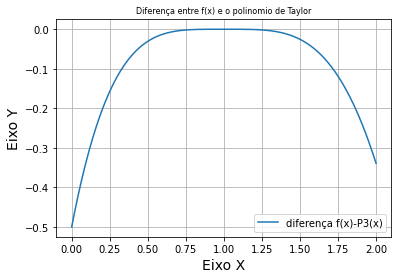

In [5]:
x=np.linspace(0,2,200)
fig, ax = plt.subplots()
ax.plot(x, f(x) - P3(x), label = 'diferença f(x)-P3(x)')
ax.set_xlabel('Eixo X',fontsize=14)
ax.set_ylabel('Eixo Y',fontsize=14)
ax.set_title('Diferença entre f(x) e o polinomio de Taylor',fontsize=8)
ax.legend(loc='lower right') 
ax.grid(True)
plt.show()

Após isso, foi necessário calcular os erros em diferentes pontos. Para isso foi definido 2 funções:
> **pontos_erro(H)**
```
def pontos_erro(h):
  l = []
  j = 1
  for j in range(6):
    p = h/2**j
    p = p + x0
    l.append(p)
  return np.array(l)
```
Que tem como parâmetro *H*, um valor aleatório (no .pdf é aconselhado testar valores, com o valor inicial 0.2) e tem como retorno um *np.array* com 5 valores a partir das fórmulas abaixo:
\begin{align}
  h_j = \frac{H}{2^j}
\end{align}
\begin{align}
  x_j = {x_0 + h_j}
\end{align}

> **erro(H)**
```
def erro(h):
  x = ponto_erro(h)
  e = np.abs(f(x) - P3(x))
  return e
```
Que tem como parâmetro *H*, um valor aleatório e tem como retorno um *np.array* com os valores de erro correspondentes aos pontos calculados.
Para evitar erros, o a função do erro foi calculada como:
\begin{align}
  e = {|f(x) - P3(x)|}
\end{align}


In [44]:
def pontos_erro(H):
  l = []
  j = 1
  for j in range(5):
    p = H/2**j
    p = p + x0
    l.append(p)
  return np.array(l)

def erro(H):
  x = pontos_erro(H)
  e = np.abs(f(x) - P3(x))
  return e

In [45]:
H = 0.2 #definindo o valor de H

for i in range(5): #criando um loop para mostrar os pontos e erros calculados.
  print("x{} = {}".format(i, pontos_erro(H)[i]))
  print("Erro = {} \n".format(erro(H)[i]))

x0 = 1.2
Erro = 0.0007041279086119623 

x1 = 1.1
Erro = 4.4960013588779546e-05 

x2 = 1.05
Erro = 2.8379145498025338e-06 

x3 = 1.025
Erro = 1.7821283959662537e-07 

x4 = 1.0125
Erro = 1.1164193569612735e-08 



Com os pontos e os erros definidos, aqui é calculado o log2 da razão dos erros consecutivos. Para isso foi utilzado a função abaixo:
> **erros_consecutivos(H)**
```
def erros_consecutivos(Erros):
  l =[]
  for i in range(4):
    e1 = erros[i]
    e2 = erros[i+1]
    l.append(np.log2(e1/e2))
  return np.array(l)
```
Que tem como parâmetro *Erros*, uma *np.array* dos erros calculados na função **erro(H)** e tem como retorno um *np.array* com 4 valores a partir da fórmula abaixo:
\begin{align}
p_j = {log_2}(\frac{erro(h_j)}{erro(h_{j+1})})
\end{align}

In [46]:
def erros_consecutivos(Erros):
  l =[]
  for i in range(4):
    e1 = Erros[i]
    e2 = Erros[i+1]
    l.append(np.log2(e1/e2))
  return np.array(l)

In [48]:
erros = erro(0.2) #o valor de erro(0.2) foi colocado em uma variável para a melhor visualização

for i in range(4): #criando um loop para mostrar a razão nos diferentes valores de j.
  print("p{} = {}".format(i+1, erros_consecutivos(erros)[i]))

p1 = 3.969123149248843
p2 = 3.985739416283866
p3 = 3.993157963478618
p4 = 3.9966503326971896


Como é perceptível os *p* vão se aproximando de 4. Isso ocorre porque após calcular o Polinômio de Taylor de grau N, essa razão tende a se aproximar de N+1. Ao ir se aproximando do x0, igualmente acontece com a razão em relação a N+1.

Para demonstrar, vamos calcular a razão com um valor menor de *H* e comparar as 2.

Foi decidido comparar o erro quando o  *H* = 0.8 e *H* = 0.4.

In [50]:
erros = erro(0.8)
erros2 = erro(0.4)

for i in range(4): #criando um loop para mostrar a razão nos diferentes valores de j.
  print("p{} = {} | p{} = {} ".format(i+1, erros_consecutivos(erros)[i], i+1, erros_consecutivos(erros2)[i]))
  print("A diferença é de {} \n".format(erros_consecutivos(erros2)[i] - erros_consecutivos(erros)[i]))

p1 = 3.8129570889512943 | p1 = 3.9283843653187436 
A diferença é de 0.11542727636744932 

p2 = 3.9283843653187436 | p2 = 3.969123149248843 
A diferença é de 0.04073878393009922 

p3 = 3.969123149248843 | p3 = 3.985739416283866 
A diferença é de 0.01661626703502339 

p4 = 3.985739416283866 | p4 = 3.993157963478618 
A diferença é de 0.007418547194751657 



Com isso, fica claro a diminuição da diferença a cada passo que os pontos vão se aproximando.